<a href="https://colab.research.google.com/github/Ds2023/Pandas_Numpy_Prac/blob/main/code_along_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importation of Necessary Libraries**

**Data Dictionary:**

- year - The manufacturing year of the vehicle.
- body - The body type of the vehicle (e.g., SUV, Sedan).
- condition - Condition of the vehicle, possibly rated on a scale.
- odometer - The mileage or distance traveled by the vehicle.
- mmr - Manheim Market Report, possibly indicating the estimated market value of the vehicle.
- selling_price - The price at which the vehicle was sold.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/car_prices.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [ ]:
data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [ ]:
data['sale_year'] = data['saledate'].str.split(expand=True)[3]
data['sale_month'] = data['saledate'].str.split(expand=True)[1]

In [ ]:
data['sale_year'] = data['sale_year'].fillna(0)
data['year'] = data['year'].fillna(0)

In [ ]:
data['Age at Sale'] = data['sale_year'].astype('int') - data['year'].astype('int')

In [ ]:
data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sale_year,sale_month,Age at Sale
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014,Dec,-1
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014,Dec,-1
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),2015,Jan,1
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),2015,Jan,0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),2014,Dec,0


**- Conversion to datetime**

In [ ]:
data['year'] = pd.to_datetime(data['year'],format='%Y')

In [ ]:
data['saledate']

0         Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1         Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2         Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3         Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4         Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
                           ...                   
558832    Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833    Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834    Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835    Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)
558836    Thu May 28 2015 05:30:00 GMT-0700 (PDT)
Name: saledate, Length: 558837, dtype: object

In [ ]:
data['parsed_date'] = pd.to_datetime(data['saledate'], utc=True, errors='coerce')

In [ ]:
data.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate', 'sale_year', 'sale_month', 'Age at Sale',
       'parsed_date'],
      dtype='object')

In [ ]:
data.nunique()

year                34
make                96
model              973
trim              1963
body                87
transmission         4
vin             550297
state               64
condition           41
odometer        172278
color               46
interior            17
seller           14263
mmr               1101
sellingprice      1887
saledate          3766
sale_year            3
sale_month           8
Age at Sale         39
parsed_date       3745
dtype: int64

**EDA using Visualizations**

In [ ]:
# Filter the df by top 10 most selling makes

In [ ]:
target = data['make'].value_counts().nlargest(10).index
target

Index(['Ford', 'Chevrolet', 'Nissan', 'Toyota', 'Dodge', 'Honda', 'Hyundai',
       'BMW', 'Kia', 'Chrysler'],
      dtype='object')

In [ ]:
filt_df = data[data['make'].isin(target)]
filt_df.head(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sale_year,sale_month,Age at Sale,parsed_date
0,2015-01-01,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014,Dec,-1,2014-12-16 04:30:00+00:00
1,2015-01-01,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014,Dec,-1,2014-12-16 04:30:00+00:00
2,2014-01-01,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),2015,Jan,1,2015-01-14 20:30:00+00:00


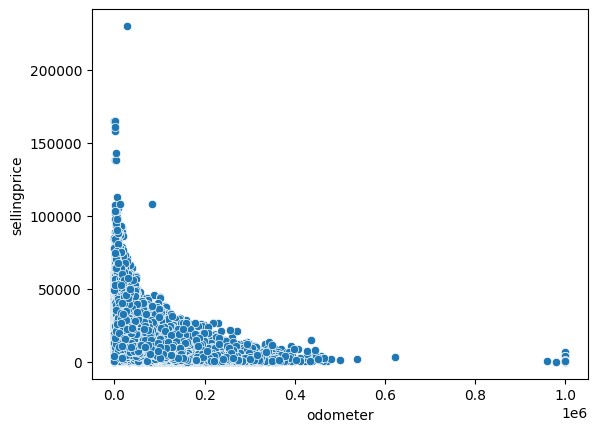

In [ ]:
sns.scatterplot(data=filt_df,x='odometer',y='sellingprice')
plt.show()

<Axes: xlabel='sellingprice', ylabel='Density'>

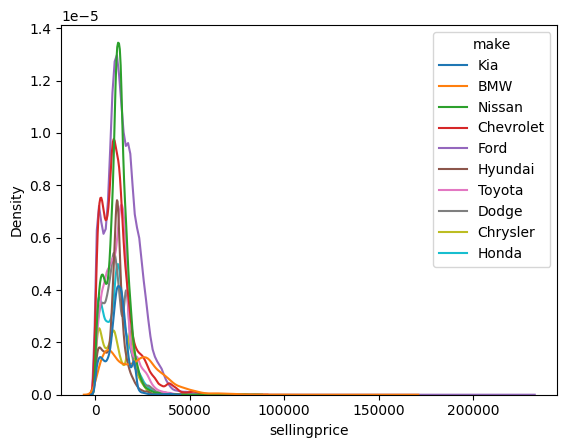

In [ ]:
sns.kdeplot(x='sellingprice',data=filt_df,hue='make')

**Trend**

seaborn.lineplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, units=None, weights=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, seed=None, orient='x', sort=True, err_style='band', err_kws=None, legend='auto', ci='deprecated', ax=None, **kwargs)

**How is the distribution of car conditions?**

- Histogram of car conditions

- Comparing the distribution of various cars.

In [ ]:
average_condition = data.groupby('Age at Sale')['condition'].mean().sort_values(ascending=False)
average_condition_df = pd.DataFrame({'Age at Sale': average_condition.index, 'Average_Condition': average_condition.values})

In [ ]:
top_condition = average_condition_df.head(10)

In [ ]:
top_condition

,Age at Sale,Average_Condition
0,2,35.135413
1,3,34.514272
2,4,33.034338
3,1,32.249891
4,0,31.083185
5,5,30.747369
6,-1,29.103448
7,6,29.001674
8,7,28.075176
9,8,26.837070


In [ ]:
# Pairplot Introduction

# sns.pairplot(data)

In [ ]:
data.corr()

<ipython-input-8-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,condition,odometer,mmr,sellingprice,Age at Sale
condition,1.000000,-0.318188,0.281415,0.321944,-0.126639
odometer,-0.318188,1.000000,-0.588113,-0.582393,0.186012
mmr,0.281415,-0.588113,1.000000,0.983635,-0.594607
sellingprice,0.321944,-0.582393,0.983635,1.000000,-0.160797
Age at Sale,-0.126639,0.186012,-0.594607,-0.160797,1.000000


In [ ]:
corr_mat = data.corr()

<ipython-input-9-f6c510d50150>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = data.corr()


<Axes: >

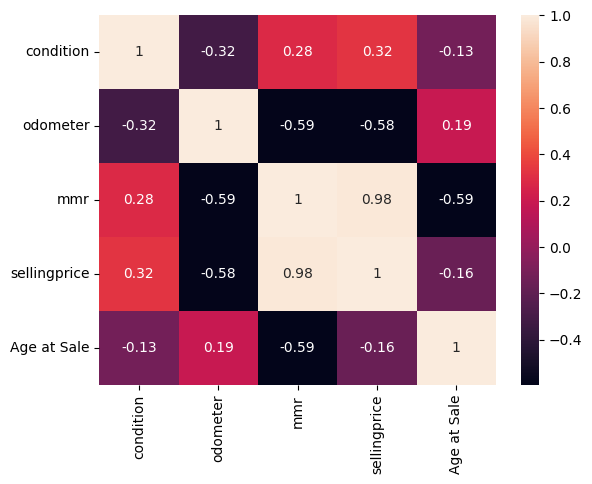

In [ ]:
sns.heatmap(corr_mat,annot=True)

**What is the average odometer reading by make and model?**

**How do selling prices vary by car make?**

**What is the most common car color?**

In [ ]:
filt_df_melted = pd.melt(filt_df, id_vars=['make'], value_vars=['sellingprice', 'mmr'],
                         var_name='variable', value_name='value')


In [ ]:
filt_df_melted

,make,variable,value
0,Kia,sellingprice,21500.0
1,Kia,sellingprice,21500.0
2,BMW,sellingprice,30000.0
3,BMW,sellingprice,67000.0
4,Nissan,sellingprice,10900.0
...,...,...,...
766739,BMW,mmr,20300.0
766740,Kia,mmr,35300.0
766741,BMW,mmr,29800.0
766742,Nissan,mmr,15100.0


In [ ]:
new_filt = filt_df_melted[filt_df_melted['value'] < 100000]

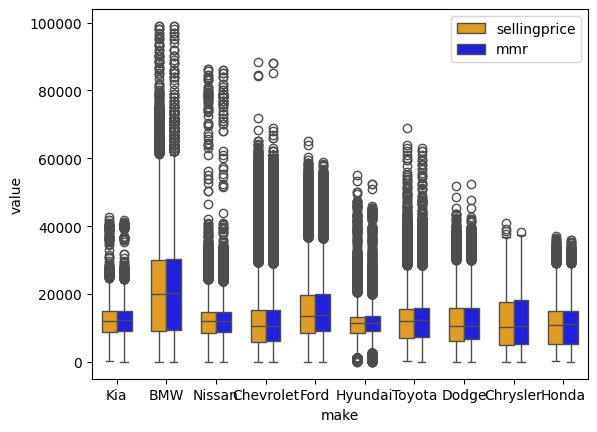

In [ ]:
boxplot = sns.boxplot(data=new_filt, x='make', y='value', hue='variable',
                      palette={'sellingprice': 'orange', 'mmr': 'blue'},
                      width=0.6)
boxplot.legend(loc='upper right')

**How does the distribution of odometer readings differ between new and used cars?**

**Is there a correlation between odometer reading and selling price?**

**What is the monthly trend in car sales?**

**How does the average selling price vary over the years?**

**Which states have the highest number of car sales?**

**What is the distribution of car transmission types?**